# FSDR-SMOTE IMPLEMENTACION #
## Alumno: Unai Lalana Morales ##
## Director: José Antonio Sanz Delgado ##

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn import model_selection

In [9]:
%load_ext autoreload
%autoreload 2
import FSDR_SMOTE
import DAB_SMOTE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
df = pd.read_csv("./../MEDIA/glass4.dat", header=None)
X = np.array(df.loc[:, df.columns != 9])
y = np.array(df[9])

Clase Positiva:  13  Clase Negativa:  201
Imbalanced Ratio:  15.461538461538462


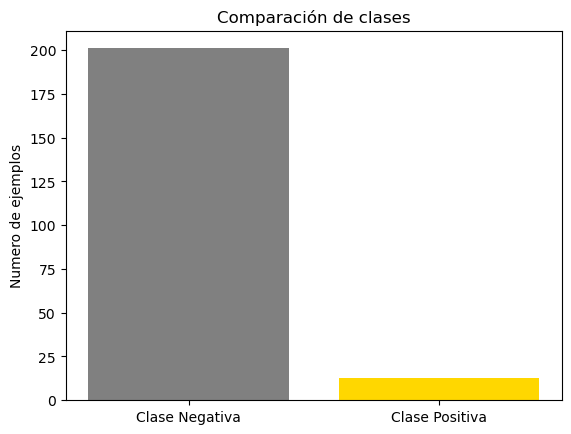

In [11]:
print("Clase Positiva: " , np.sum(df[9] == " positive") , " Clase Negativa: " , np.sum(df[9] == " negative"))
print("Imbalanced Ratio: ", np.sum(df[9] == " negative")/np.sum(df[9] == " positive"))
labels = ['Clase Negativa', 'Clase Positiva']
valores = [np.sum(df[9] == " negative"), np.sum(df[9] == " positive")]

plt.bar(labels, valores, color=['gray', 'gold'])
plt.title('Comparación de clases')
plt.ylabel('Numero de ejemplos')

plt.show()

0.23529411764705882


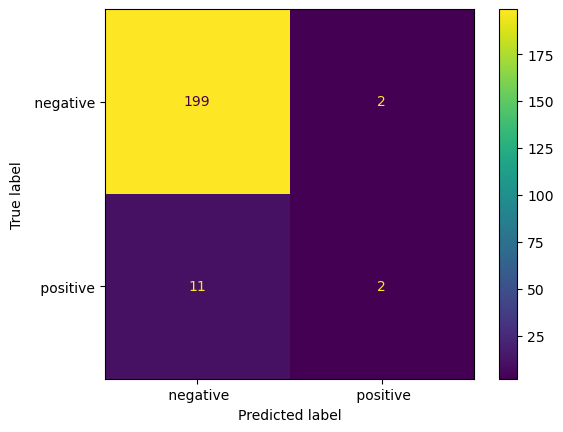

In [12]:
clasificador = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificador.fit(X, y)
predictions = clasificador.predict(X)
clasificador.score(X, y)
print(f1_score(np.array(y), predictions, pos_label=" positive"))
cm = confusion_matrix(y, predictions, labels=clasificador.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificador.classes_)
disp.plot()
plt.show()

0.6153846153846154


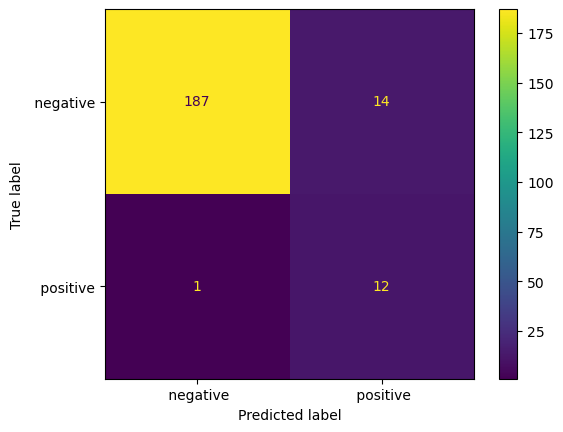

In [34]:
fs = FSDR_SMOTE.FSDR_SMOTE(distMethod = "euclidean", p=3, k = 2.5)
nuevaX, nuevaY = fs.fit_resample(X, y)
clasificador2 = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificador2.fit(nuevaX, nuevaY)
predictions = clasificador2.predict(X)
print(f1_score(np.array(y), predictions, pos_label=" positive"))
cm = confusion_matrix(y, predictions, labels=clasificador2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificador2.classes_)
disp.plot()
plt.show()

0.7857142857142857


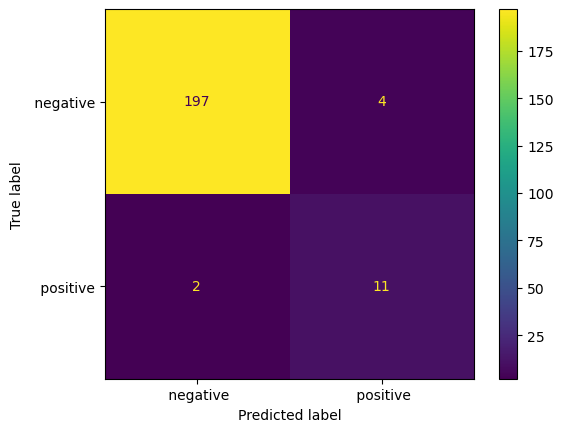

In [33]:
dab = DAB_SMOTE.DAB_SMOTE(distMethod = "euclidean", k = 2.5)
nuevaX2, nuevaY2 = dab.fit_resample(X, y)
clasificador3 = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificador3.fit(nuevaX2, nuevaY2)
predictions2 = clasificador3.predict(X)
print(f1_score(np.array(y), predictions2, pos_label=" positive"))
cm = confusion_matrix(y, predictions2, labels=clasificador3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificador3.classes_)
disp.plot()
plt.show()

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=42, stratify= y)

0.0


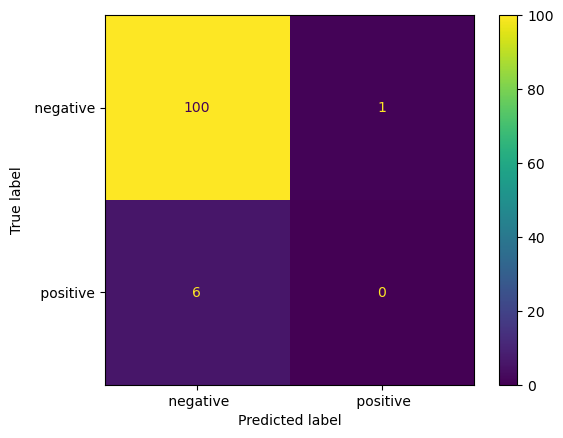

In [36]:
clasificadorNormal = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificadorNormal.fit(X_train, y_train)

predictions = clasificadorNormal.predict(X_test)

print(f1_score(np.array(y_test), predictions, pos_label=" positive"))

cm = confusion_matrix(y_test, predictions, labels=clasificadorNormal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificadorNormal.classes_)
disp.plot()
plt.show()

0.5882352941176471


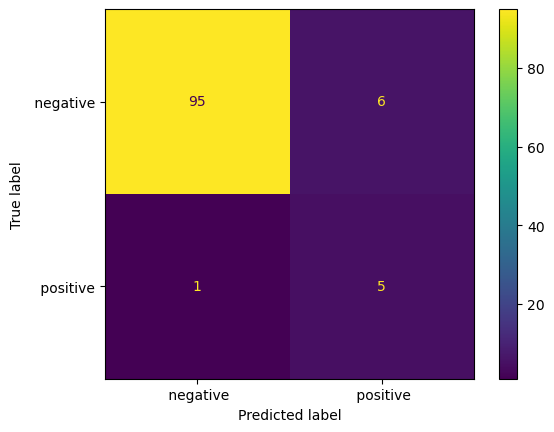

In [55]:
fs = FSDR_SMOTE.FSDR_SMOTE(distMethod = "euclidean", p=2, k = 1.35)
X_train_oversampled, y_train_oversampled = fs.fit_resample(X_train, y_train)
clasificadorOver = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificadorOver.fit(X_train_oversampled, y_train_oversampled)

predictions = clasificadorOver.predict(X_test)
print(f1_score(np.array(y_test), predictions, pos_label=" positive"))

cm = confusion_matrix(y_test, predictions, labels=clasificadorOver.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificadorOver.classes_)
disp.plot()
plt.show()

0.6666666666666666


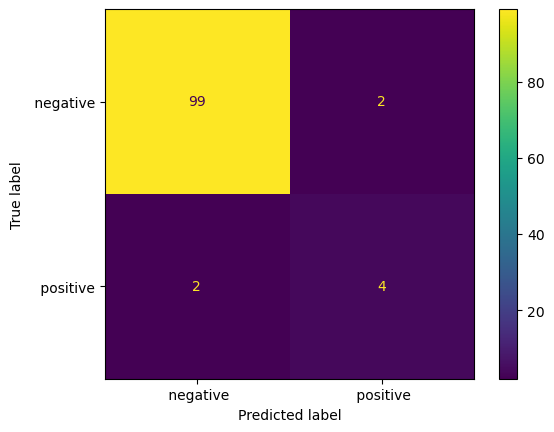

In [57]:
dab = DAB_SMOTE.DAB_SMOTE(distMethod = "euclidean", k = 1.75)
X_train_oversampled, y_train_oversampled = dab.fit_resample(X_train, y_train)
clasificadorOver = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificadorOver.fit(X_train_oversampled, y_train_oversampled)

predictions = clasificadorOver.predict(X_test)
print(f1_score(np.array(y_test), predictions, pos_label=" positive"))

cm = confusion_matrix(y_test, predictions, labels=clasificadorOver.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificadorOver.classes_)
disp.plot()
plt.show()